<a href="https://colab.research.google.com/github/RidhoAnfaal/MachineLearning/blob/main/JS09_TG01_2341720222_Ridho_Anfa'al.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Lab 0**

## Random Split

Step 1 - Load Data


In [2]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/ML/Titanic-Dataset-selected.csv')
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Step 2 - Split Data



In [3]:
# Split data
from sklearn.model_selection import train_test_split

# Split training data and the remainder
# the remainder will be split again into validation and testing.
# The ratio we will use is 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split again between validation and testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Check the respective dataset sizes

print(f'Original data count: {df.shape[0]}')
print(f'Training data count: {df_train.shape[0]}')
print(f'Validation data count: {df_val.shape[0]}')
print(f'Test data count: {df_test.shape[0]}')

# Check the ratio of each label
print('=========')
print(f'Original label counts:\n{df.Survived.value_counts()}')
print(f'Training label counts:\n{df_train.Survived.value_counts()}')
print(f'Validation label counts:\n{df_val.Survived.value_counts()}')
print(f'Test label counts:\n{df_test.Survived.value_counts()}')

Original data count: 891
Training data count: 712
Validation data count: 89
Test data count: 90
Original label counts:
Survived
0    549
1    342
Name: count, dtype: int64
Training label counts:
Survived
0    439
1    273
Name: count, dtype: int64
Validation label counts:
Survived
0    53
1    36
Name: count, dtype: int64
Test label counts:
Survived
0    57
1    33
Name: count, dtype: int64


## Stratified Split

Step 1 - Load Data



In [4]:
import pandas as pd

df2 = pd.read_csv('/content/gdrive/MyDrive/ML/Titanic-Dataset-selected.csv')
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Step 2 - Split Data



In [5]:
# Split data
from sklearn.model_selection import train_test_split

# Split training data and the remainder
# the remainder will be split again into validation and testing.
# The ratio we will use is 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split again between validation and testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Check the respective dataset sizes

print(f'Original label counts:\n{df2.Survived.value_counts()}')
print(f'Training label counts:\n{df2_train.Survived.value_counts()}')
print(f'Validation label counts:\n{df2_val.Survived.value_counts()}')
print(f'Test label counts:\n{df2_test.Survived.value_counts()}')

Original label counts:
Survived
0    549
1    342
Name: count, dtype: int64
Training label counts:
Survived
0    439
1    273
Name: count, dtype: int64
Validation label counts:
Survived
0    51
1    38
Name: count, dtype: int64
Test label counts:
Survived
0    59
1    31
Name: count, dtype: int64


Cross Validation 1
## New section

Step 1 - Load Data



In [6]:
import pandas as pd

df3 = pd.read_csv('/content/gdrive/MyDrive/ML/Titanic-Dataset-selected.csv')
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Step 2 - Split Data



In [7]:
# Implementation of k-fold cross-validation (random) with training and testing only
from sklearn.model_selection import KFold

# initialize the kfold object
kf = KFold(n_splits=4)
print(f'Number of folds: {kf.get_n_splits()}')
print(f'KFold object: {kf}')

# Perform splitting with KFold
kf_split = kf.split(df3)
print(f'Number of rows in df: {df.shape[0]}')

# check the data indices for each fold
for train_index, test_index in kf_split:
    print(f'Train index: {train_index} | Test index: {test_index}')

Number of folds: 4
KFold object: KFold(n_splits=4, random_state=None, shuffle=False)
Number of rows in df: 891
Train index: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438


## Cross Validation 2

Step 1 - Load Data



In [8]:
import pandas as pd

df4 = pd.read_csv('/content/gdrive/MyDrive/ML/Titanic-Dataset-selected.csv')
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


Step 2 - Split Data



In [9]:
# Implementation of k-fold cross-validation (random) with training, validation, and testing data
from sklearn.model_selection import train_test_split, KFold

# First split between training and testing data using train_test_split
# 8:2 ratio for training and testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# initialize the kfold object
kf2 = KFold(n_splits=4)
print(f'Number of folds: {kf2.get_n_splits()}')
print(f'KFold object: {kf2}')

# Perform splitting with KFold for the training dataframe
# With this procedure, we still retain testing data for model evaluation
# while nevertheless being able to perform evaluation using validation data
kf2_split = kf2.split(df_train)
print(f'Number of rows in df_train: {df4_train.shape[0]}')

# check the data indices for each fold
for train_index, test_index in kf2_split:
    print(f'Train index: {train_index} | Test index: {test_index}')

Number of folds: 4
KFold object: KFold(n_splits=4, random_state=None, shuffle=False)
Number of rows in df_train: 712
Train index: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 39

# **Lab 1**

## Step 2: Import Libraries

In [10]:
# import package
import numpy as np
import pandas as pd

## Step 3: Read the Data

In [11]:
# read data from CSV file
data = pd.read_csv('/content/gdrive/MyDrive/ML/dataset.csv')

## Step 4: Understanding the Data

In [12]:
# view some initial data
data.head()

# check data dimensions
data.shape

# information about the data
data.info()

# data description
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Step 5: Data Visualization

In [13]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


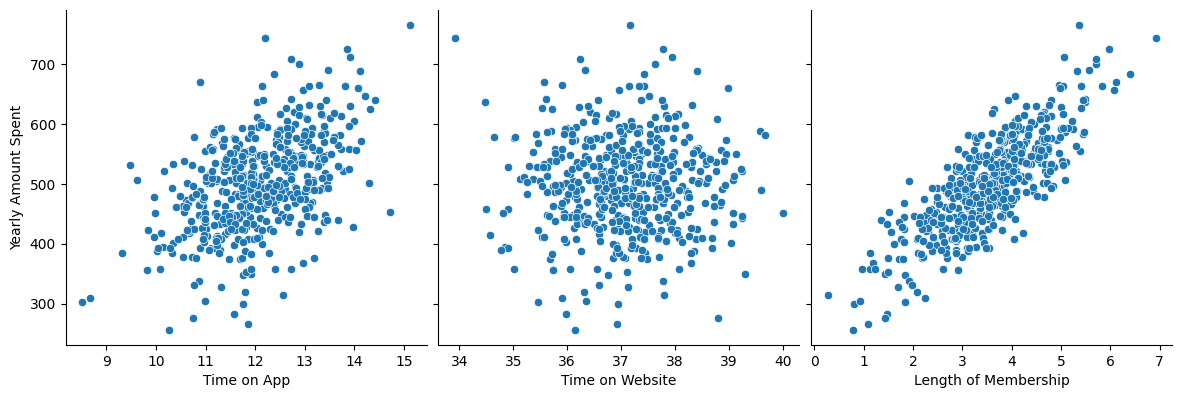

In [14]:
# visualize data with pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

In [16]:
# visualize correlation with heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

ValueError: could not convert string to float: 'mstephenson@fernandez.com'

## Step 6: Linear Regression

In [17]:
# Create independent variable X and Y, example selection from prior correlation analysis
X = data['Length of Membership']
y = data['Yearly Amount Spent']

In [18]:
# Split training and test data with a 7:3 proportion
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [19]:
# Model training
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

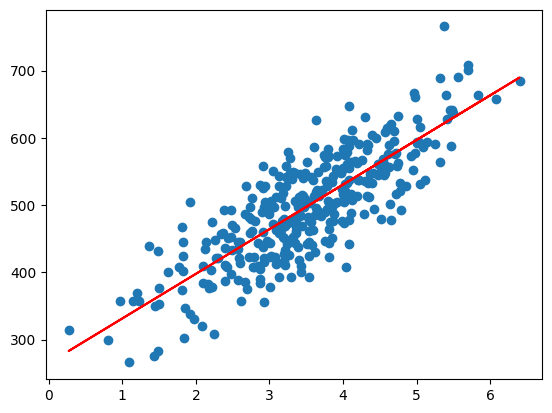

In [20]:
# Visualization of regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

## Step 7: Residual Analysis

In [21]:
# Predict y_value from the trained x data
y_train_pred = lr.predict(X_train_sm)

# Calculating residuals
res = (y_train - y_train_pred)

/tmp/ipython-input-4216909171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


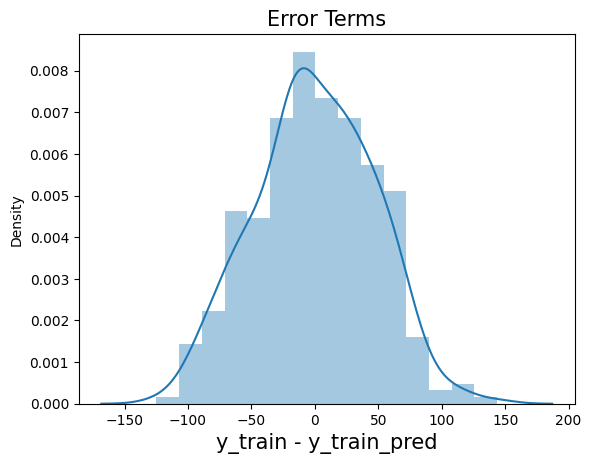

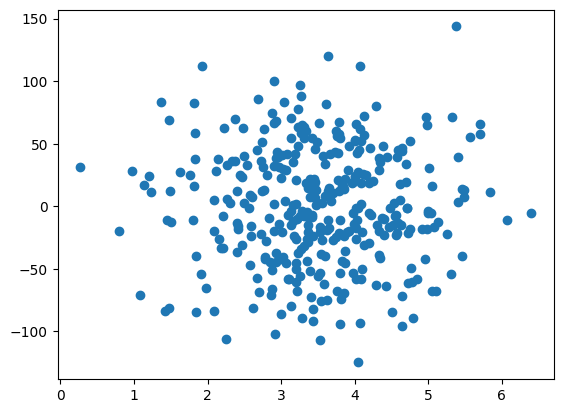

In [22]:
# Residual histogram
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Residual scatter plot
plt.scatter(X_train, res)
plt.show()

## Step 8: Prediction on Test Data and Model Evaluation

In [23]:
# Prediction on test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [24]:
# Compute R-squared value
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

## Step 9: Visualization of Results

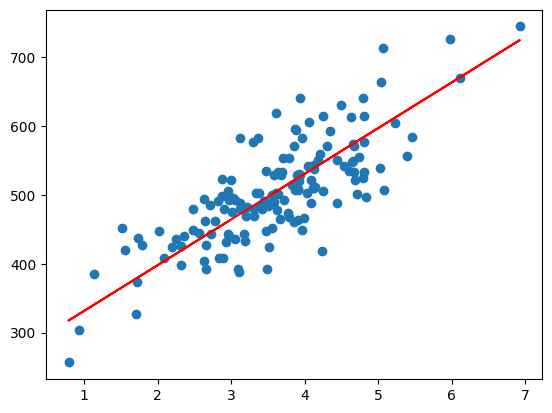

In [25]:
# Visualize test data and prediction results
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# **Lab 2**

## Step 1 - Import Libraries

In [26]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 2 - Load the Dataset

In [27]:
# Importing the dataset (Ensure you have the CSV file 'Posisi_gaji.csv' in the same directory)
dataset = pd.read_csv('/content/gdrive/MyDrive/ML/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Change to a single column only

## Langkah 3 - Features Scaling

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

## Langkah 4 - Fitting Model SVR

In [29]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Langkah 5 - Visualisasi Hasil SVR

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


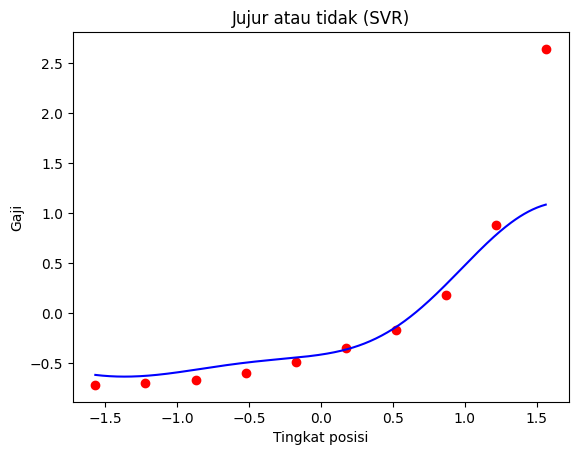

In [30]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

## Langkah 6 - Prediksi Hasil

In [31]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

## Langkah 7 - Menampilkan Hasil

In [32]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


## Langkah 8 - Evaluasi Model SVR

In [33]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# **Lab Assignment**

In [34]:
import pandas as pd

# Load dataset
path = "/content/gdrive/MyDrive/ML/insurance.csv"
data = pd.read_csv(path)

# Show first few rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
X = data.drop(columns=['charges'])

y = data['charges']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (1338, 6)
Target shape: (1338,)


In [46]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X, drop_first=True)

# 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)

Train set: (1070, 8)
Test set: (268, 8)


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr = lin_reg.predict(X_test_scaled)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression Evaluation:")
print(f"R² Score : {r2:.4f}")
print(f"MSE       : {mse:.2f}")
print(f"MAE       : {mae:.2f}")

Linear Regression Evaluation:
R² Score : 0.7836
MSE       : 33596915.85
MAE       : 4181.19


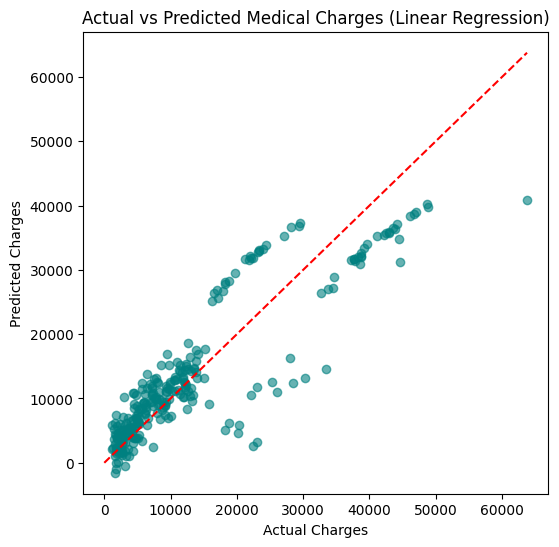

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='teal')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges (Linear Regression)")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.show()

In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVR(), param_grid, scoring='r2', cv=5)
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)

svr_best = grid.best_estimator_

y_pred_svr = svr_best.predict(X_test_scaled)

Best parameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}


In [52]:
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print("SVR Evaluation:")
print(f"R² Score : {r2_svr:.4f}")
print(f"MSE : {mse_svr:.2f}")
print(f"MAE : {mae_svr:.2f}")


SVR Evaluation:
R² Score : 0.2453
MSE : 117159516.09
MAE : 5868.89


In [53]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'SVR (RBF)'],
    'R2 Score': [r2, r2_svr],
    'MSE': [mse, mse_svr],
    'MAE': [mae, mae_svr]
})
comparison

,Model,R2 Score,MSE,MAE
0,Linear Regression,0.783593,3.359692e+07,4181.194474
1,SVR (RBF),0.245343,1.171595e+08,5868.890477


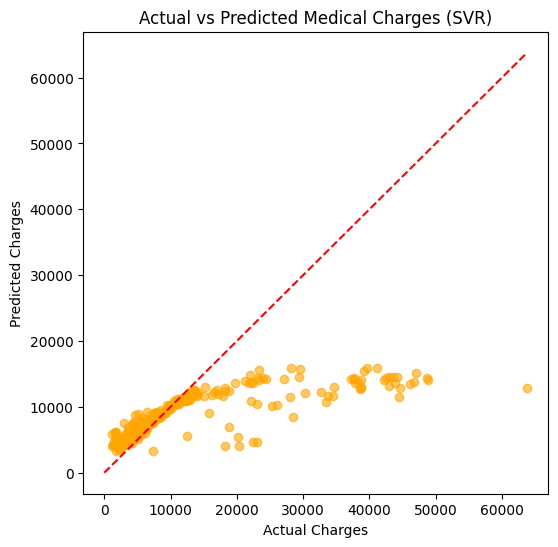

In [55]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_svr, alpha=0.6, color='orange')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges (SVR)")
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.show()